## Diabetics prediction(Logistic Regression)

In [6]:
#Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [13]:
dataset = pd.read_csv("diabetes.csv")

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

In [17]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
#dataset statistics
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Evaluation data analysis

## Histogram

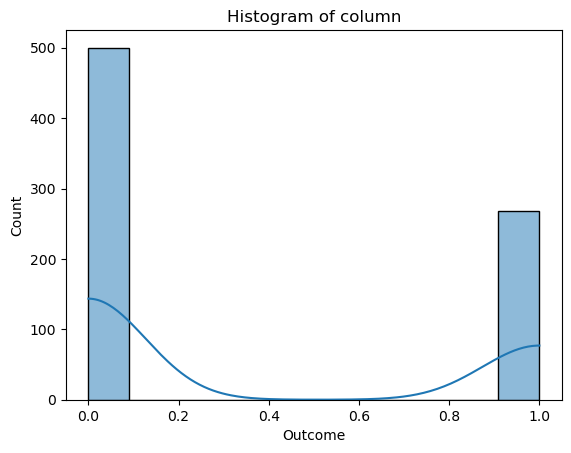

In [25]:
sns.histplot(dataset['Outcome'], kde=True)
plt.title('Histogram of column')
plt.show()

## Scatter plot

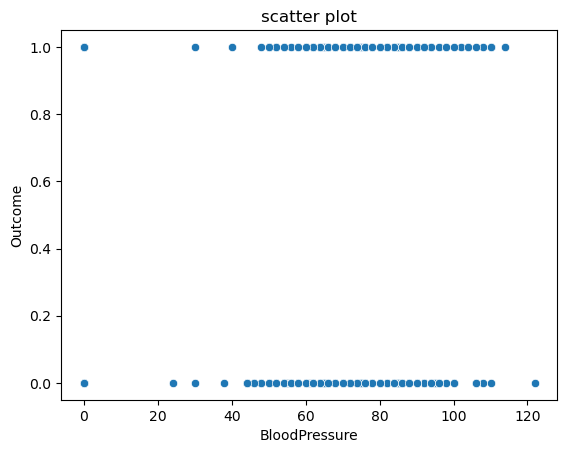

In [27]:
sns.scatterplot(x='BloodPressure', y='Outcome', data=dataset)
plt.title('scatter plot')
plt.show()


## Feature Engineering

In [30]:
#dividing the dataset into x and y
X = dataset.drop(['Outcome'],axis=1)
y = dataset['Outcome']

In [33]:
# x and y shape
X.shape,y.shape

((768, 8), (768,))

In [35]:
#columns description
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Splitting the dataset into the Training set and Test set

In [40]:
#importing the module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [46]:
from sklearn.linear_model import LogisticRegression
c = LogisticRegression(C=1.0)
c.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [87]:
y_pred = c.predict(X_test)
y_prob = c.predict_proba(X_test)[:, 1]

In [51]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Outcome","Outcome"])
calculation.tail(100)

,Outcome,Outcome
92,0,0
93,0,0
94,0,1
95,0,0
96,1,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,0


## Model training and Evaluation


In [91]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Confusion Matrix

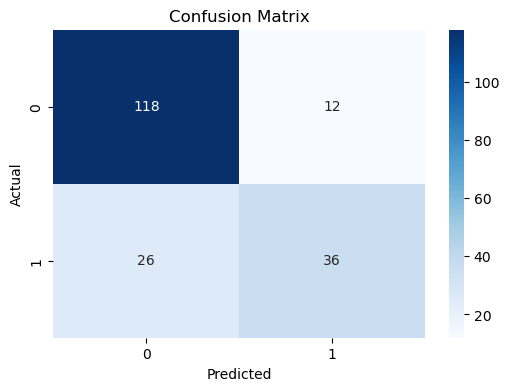

In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Classification Report

In [95]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



### ROC Curve

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

## Computing the accuracy

In [54]:
#importing module for computing
from sklearn.metrics import accuracy_score

In [56]:
# TRAINING DATA ACCURACY
X_pred = c.predict(X_train)

In [58]:
accuracy_score_train= accuracy_score(y_train,X_pred)

In [60]:
print("Accuracy score of training data: " + str(accuracy_score_train))

Accuracy score of training data: 0.7638888888888888


In [62]:
#TESTING DATA ACCURACY
accuracy_score_test= accuracy_score(y_test,y_pred)

In [64]:
print("Accuracy score of testing data: " + str(accuracy_score_test))

Accuracy score of testing data: 0.8020833333333334
